# Redes Neurais Artificiais: Projeto Prático 2
Aprendizado Supervisionado com Neurônio Perceptron


**Integrantes:**

- **[Leonardo Monteiro Neres de Lima](https://github.com/MichPaz)** - 1615080320 - lmndl.eng16@uea.edu.br
- **[Thatielen Oliveira Pereira](https://github.com/thatielenoliveira)** - 1515080618 - top.eng@uea.edu.br
- **[Vyctor Lima Negreiros](https://github.com/VycLN)** - 1615080372 - vln.eng16@uea.edu.br

## Preparação Inicial

### Bibiotecas Utilizadas

In [2]:
import math, matplotlib.pyplot as plt, numpy as np, os, pandas as pd, random

### Definindo Precisão de Quatro Casas Decimais

In [3]:
np.set_printoptions(precision=4)
pd.set_option('display.precision', 4)

### Funções Auxiliares

In [4]:
# Preparação dos arrays de entradas
def separar_entradas(registros):
    entrada = []
    
    for registro in registros:
        entrada.append([])
        entrada[-1].append(-1)
        entrada[-1].append(registro[0])
        entrada[-1].append(registro[1])
    
    return np.array(entrada, dtype=float)

# Preparação dos arrays de saídas
def separar_saidas(registros):
    saida = []
    
    for registro in registros:
        saida.append(registro[2])
    
    return np.array(saida, dtype=int)

# Mapear labels para cores
def criar_cores(saidas):
    cores, mapa_cores = [], {0: 'red', 1: 'blue'}
    
    for saida in saidas:
        cores.append(mapa_cores[saida])

    return cores

# Função para aleatorização dos arrays de entradas e saídas
def aleatoriza(entradas, saidas):
    entrada_aleatoria, saida_aleatoria, tam = np.array([]), np.array([]), len(entradas)
    
    for i in range(tam): 
        index = random.randint(0, len(entradas) - 1)

        entrada_aleatoria = np.append(entrada_aleatoria, entradas[index])
        saida_aleatoria = np.append(saida_aleatoria, saidas[index])

        entradas = np.delete(entradas, index, 0)
        saidas = np.delete(saidas, index, 0)

    entrada_aleatoria = entrada_aleatoria.reshape(entrada_aleatoria.size // 3, 3)
    
    return (entrada_aleatoria, saida_aleatoria)

# Implementação do cálculo da acurácia
def acuracia(vp, vn, fp, fn):
    return (vp + vn) / (vp + vn + fp + fn)

# Implementação do cálculo da precisão
def precisao(vp, vn, fp, fn):
    return vp / (vp + fp)

# Implementação do cálculo da revocação
def revocacao(vp, vn, fp, fn):
    return vp / (vp + fn)

# Implementação do cálculo do f1 score
def f1(vp, vn, fp, fn):
    r = revocacao(vp, vn, fp, fn)
    p = precisao(vp, vn, fp, fn)
    
    return 2 * (r * p) / (r + p) 

### Implementação do Perceptron

In [5]:
class Perceptron:
    # Instanciação do objeto Perceptron de acordo com parâmetros
    def __init__(self, teta, taxa_aprendizagem, pesos):
        self.teta = teta
        self.taxa_aprendizagem = taxa_aprendizagem
        self.pesos = pesos
        
    # Função de ativação degrau
    def funcao_ativacao(self, soma):
        if (soma >= self.teta):
            return 1
        return 0

    # Função que realiza o produto escalar de um regitro com os pesos
    def calculo_saida(self, registro):
        soma = registro.dot(self.pesos)
        return self.funcao_ativacao(soma)

    # Função de treinamento que é executada até que não haja erro ou limite de iterações caso fornecido
    def treinamento(self, entradas, saidas, max_epocas=0, aleatorio=False, debug=True):
        # Aleatorização das entradas
        if aleatorio:
            entradas, saidas = aleatoriza(entradas, saidas)
        
        # Inicialização de variáveis
        epocas, ajustes_por_epoca, saidas_treinamento = 1, [], np.array([], dtype=int)
        
        # Exibição inicial dos pesos
        if debug:
            print('Pesos Iniciais:', self.pesos)
            print()

        # Loop que garante a execução até que não haja erro
        while (np.array_equal(saidas, saidas_treinamento) == False and (epocas < max_epocas or max_epocas == 0)):
            ajustes_pesos, saidas_treinamento = 0, np.array([], dtype=int)
            
            # Loop para percorrer todas as entradas/saídas
            for i in range(0, len(entradas), 1):
                alterou_pesos = False
                
                # Cálculo da saída para a entrada atual aplicando-se os pesos
                saida_calculada = self.calculo_saida(np.asarray(entradas[i]))
                
                # Cálculo do erro da saída
                erro = saidas[i] - saida_calculada
                # Salvamento da saída
                
                saidas_treinamento = np.append(saidas_treinamento, saida_calculada)
                # Loop para atualização do vetor de pesos
                
                for j in range(0, len(self.pesos)):
                    # Cálculo do novo peso
                    aux = self.pesos[j] + (self.taxa_aprendizagem * entradas[i][j] * erro)
                    
                    # Contagem de ajustes dos pesos da época caso haja mudança de valor
                    if(aux != self.pesos[j]):
                        ajustes_pesos += 1
                        alterou_pesos = True
                    
                    self.pesos[j] = aux
                
                # Exibe os pesos casa haja alteração
                if(alterou_pesos == True and debug):
                    print('Novos Pesos:', self.pesos)
            
            # Exibe o número de ajustes de pesos da época
            if debug:    
                print()
                print('%d ajustes no vetor de pesos na época %d' % (ajustes_pesos, epocas))
                print()
            
            # Guarda o total de ajustes por época
            ajustes_por_epoca.append(ajustes_pesos)
            epocas += 1

        return epocas, ajustes_por_epoca
    
    # Função para predição de valores
    def predicao(self, registros):
        y_previsto = []
        
        for i in range(len(registros)):
            y_previsto.append(self.calculo_saida(np.asarray(registros[i])))
        
        return y_previsto
    
    # Função para retorno da matriz de confusão
    def matriz_confusao(self, previsto, real):
        vp, vn, fp, fn = 0, 0, 0, 0
        
        for i in range(len(real)):
            if (real[i] == 0):
                if (previsto[i] == 0):
                    vn += 1
                else:
                    fn += 1
            else:
                if (previsto[i] == 1):
                    vp += 1
                else:
                    fp += 1
                    
        return [[vp, fp], [fn, vn]], (vp, vn, fp, fn)

## Parte I – Resolvendo um Problema Linearmente Separável

### Leitura do arquivo `dataAll.txt`

In [6]:
data = np.fromfile(os.path.join('datasets', 'dataAll.txt'), dtype=float)
print(data.shape)

(3000,)


### Redimensionamento do Array

In [7]:
registros = data.reshape(data.size // 3, 3)
print(registros.shape)

(1000, 3)


### Preparação dos Arrays de Entradas e Saídas

In [8]:
X = separar_entradas(registros)
print(X.shape)

Y = separar_saidas(registros)
print(Y.shape)

(1000, 3)
(1000,)


## 1. As equipes devem utilizar a função de ativação degrau com θ = 0;

In [9]:
teta = 0

## 2. O valor da taxa de aprendizado deve ser igual a η = 0,1;

In [10]:
taxa_aprendizagem = 0.1

## 3. O vetor inicial de pesos deve ter seus valores inicializados conforme uma variável aleatória de distribuição uniforme no intervalo, isto é, wi ∼ U(−0,5, + 0,5). O vetor inicial de pesos deve ser impresso no início da execução do algoritmo;

In [11]:
pesos_iniciais = np.random.uniform(-0.5, 0.5, X.shape[1])

### Instanciação do Perceptron

In [12]:
perceptron1 = Perceptron(teta=teta, taxa_aprendizagem=taxa_aprendizagem, pesos=pesos_iniciais)
print(perceptron1.pesos)

[ 0.3577 -0.4666 -0.382 ]


## 4. A cada época deve ser indicado o número de ajustes feitos no vetor de pesos;
## 5. Sempre que o vetor de pesos for ajustado, este deve ser impresso;
## 6. O algoritmo deve executar até a convergência, isto é, até que não haja erros para todos os exemplos presentes no conjunto de treinamento;

**Os items 4, 5 e 6 são respondidos nas células seguir:**

### Treinamento do Neurônio

In [13]:
epocas, ajustes_por_epoca = perceptron1.treinamento(X, Y)

Pesos Iniciais: [ 0.3577 -0.4666 -0.382 ]

Novos Pesos: [  0.4577  35.9122 -24.7962]
Novos Pesos: [   0.5577  -17.7469 -101.292 ]
Novos Pesos: [  0.4577  55.0492 -65.4624]
Novos Pesos: [  0.3577 137.6479  14.3934]
Novos Pesos: [  0.4577 143.4936 -63.9012]
Novos Pesos: [   0.5577  103.4847 -141.7939]
Novos Pesos: [  0.6577 157.1545 -92.7016]
Novos Pesos: [   0.5577  104.1945 -149.5711]
Novos Pesos: [  0.6577 163.754  -99.4487]
Novos Pesos: [   0.5577  118.2294 -165.0847]
Novos Pesos: [  0.6577 208.9452 -90.3713]
Novos Pesos: [   0.5577  151.1642 -150.6795]

36 ajustes no vetor de pesos na época 1


0 ajustes no vetor de pesos na época 2



## 7. Ao final, deve-se imprimir:

## a) O número total de ajustes no vetor de pesos;

In [14]:
print('Total de ajustes de pesos:', sum(ajustes_por_epoca))

Total de ajustes de pesos: 36


## b) O número de épocas até a convergência;

In [15]:
print('Total de Épocas:', epocas)

Total de Épocas: 3


## c) O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.

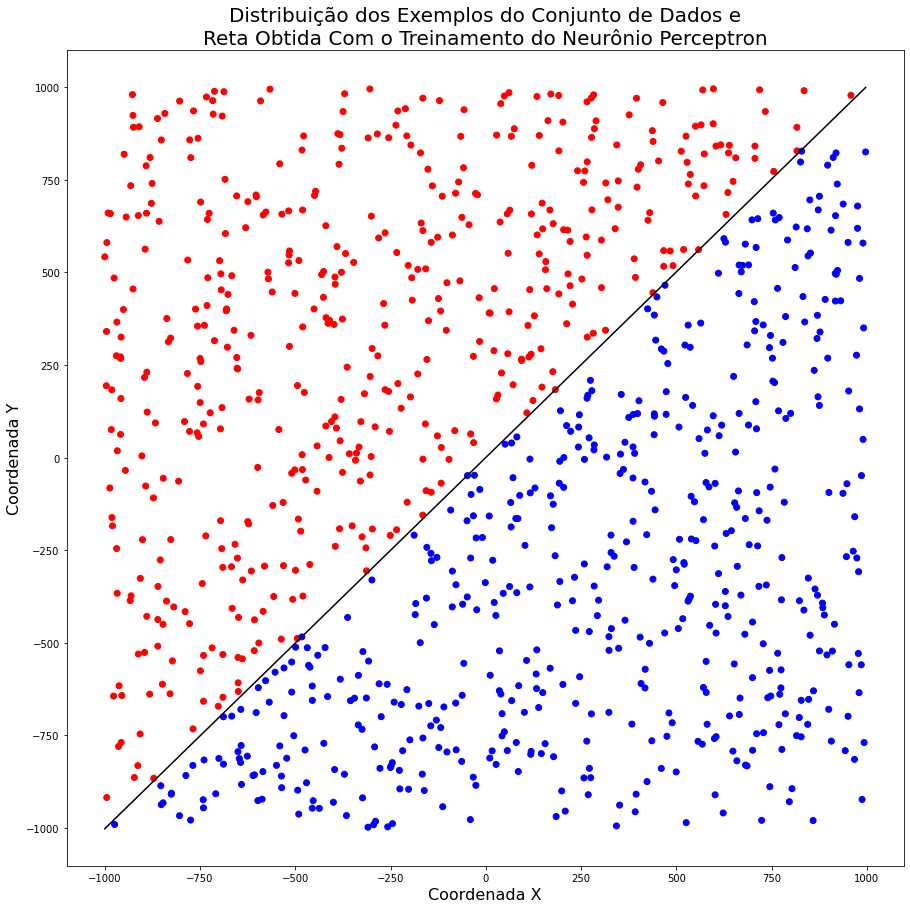

In [16]:
plt.rcParams['figure.figsize'] = (15, 15)

# Cálculo dos coeficientes da linha de decisão
a, b = perceptron1.pesos[0] / perceptron1.pesos[2], (-1) * (perceptron1.pesos[1] / perceptron1.pesos[2])
menor, maior = min(X[:,1]), max(X[:,1])

# Criando os pontos da linha de decisão para treino
x = np.arange(menor, maior, 0.1)
y = a + b * x

# Criação de cores de acordo com a saída
cores = criar_cores(Y)

# Criação do gráfico para treino    
plt.plot(x, y, color='black', markersize=100)
plt.title('Distribuição dos Exemplos do Conjunto de Dados e\n' \
          'Reta Obtida Com o Treinamento do Neurônio Perceptron', size=20)

plt.xlabel('Coordenada X', size=16)
plt.ylabel('Coordenada Y', size=16)

plt.scatter(X[:,1], X[:,2], marker='o', color=cores)
plt.show()

## Parte II – Experimentação

### Parâmetros Necessários

In [17]:
# Teta e intervalos para distribuição de pesos respectivamente
teta, intervalos = 0, [(-100, 100), (-1, 1), (-0.5, 0.5)]

# Taxas de aprendizagem
n = [0.4, 0.1, 0.01]

### Produto Cartesiano para Gerar uma Lista de Configurações

In [18]:
index = pd.MultiIndex.from_product([n, intervalos], names=['n', 'intervalo'])
configuracoes = pd.DataFrame(index=index).reset_index()

### Leitura do Arquivo `data2.txt`

In [19]:
data = np.fromfile(os.path.join('datasets', 'data2.txt'), dtype=float)
print(data.shape)

(1800,)


### Redimensionamento do Array

In [20]:
registros = data.reshape(data.size // 3, 3)
print(registros.shape)

(600, 3)


### Preparação dos Arrays de Entradas e Saídas

In [21]:
X = separar_entradas(registros)
print(X.shape)

Y = separar_saidas(registros)
print(Y.shape)

(600, 3)
(600,)


### Iteração pela Lista de Configurações e Evidências da Convergência para Cada Configuração

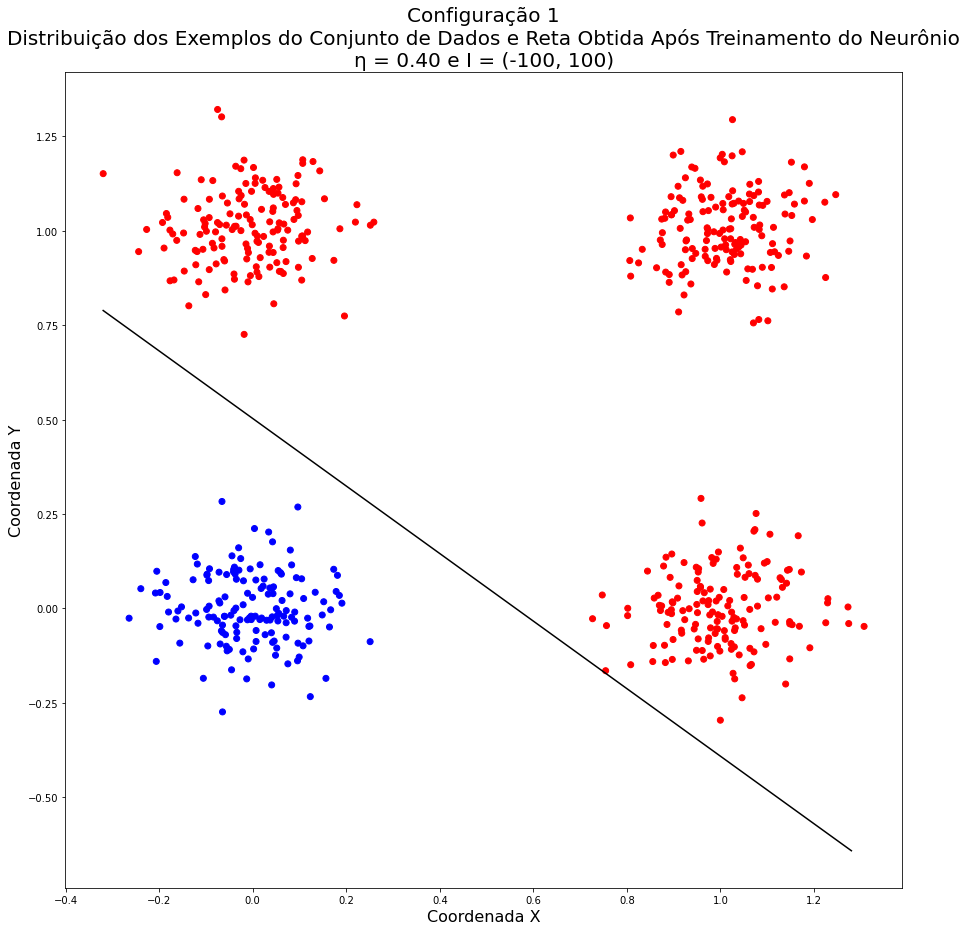

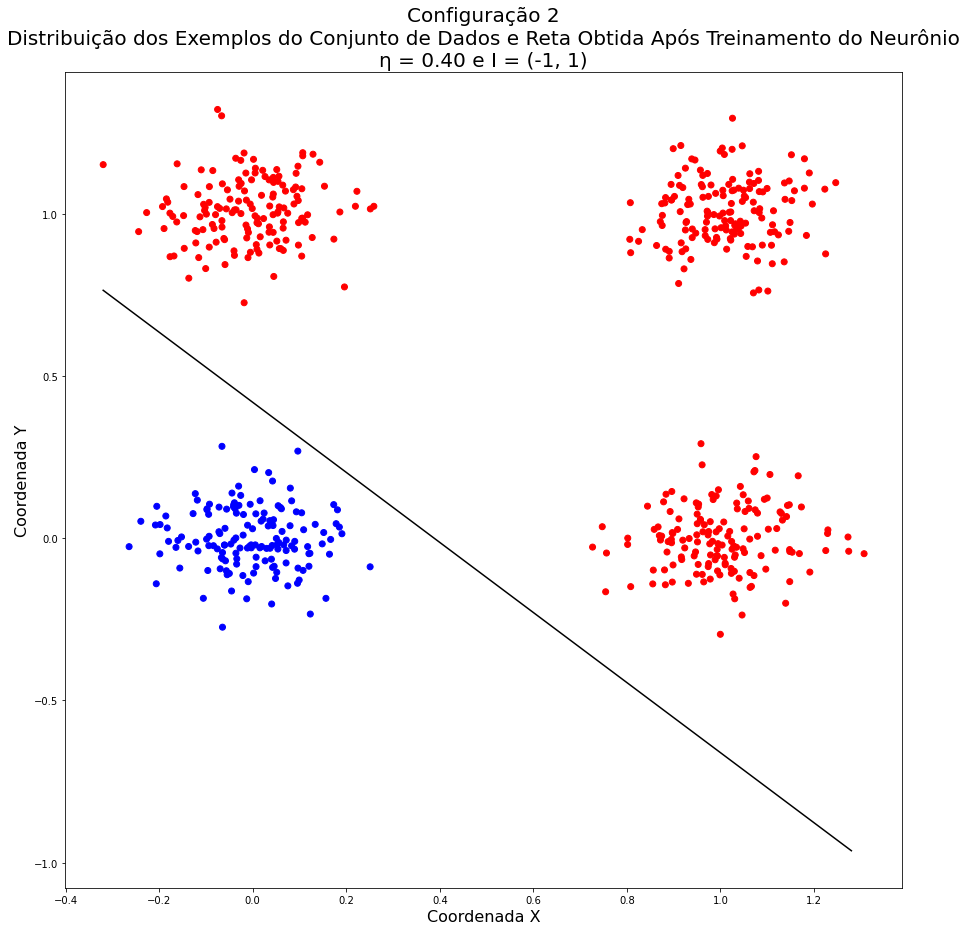

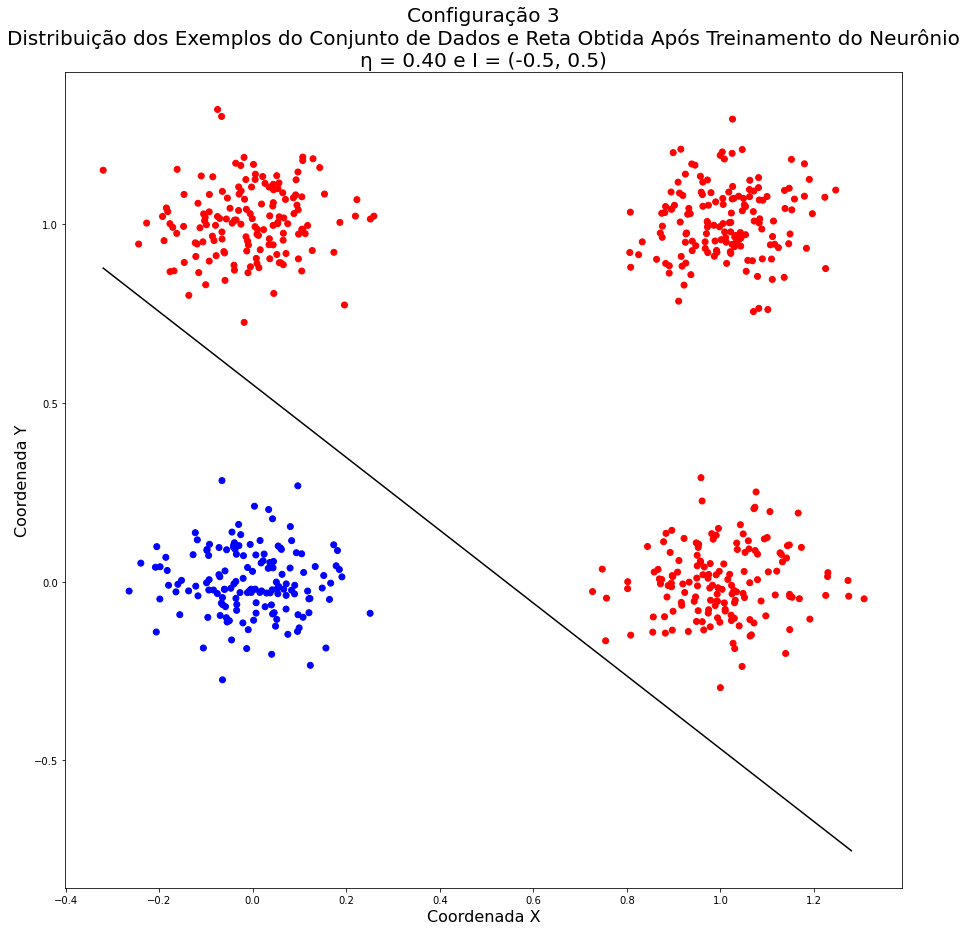

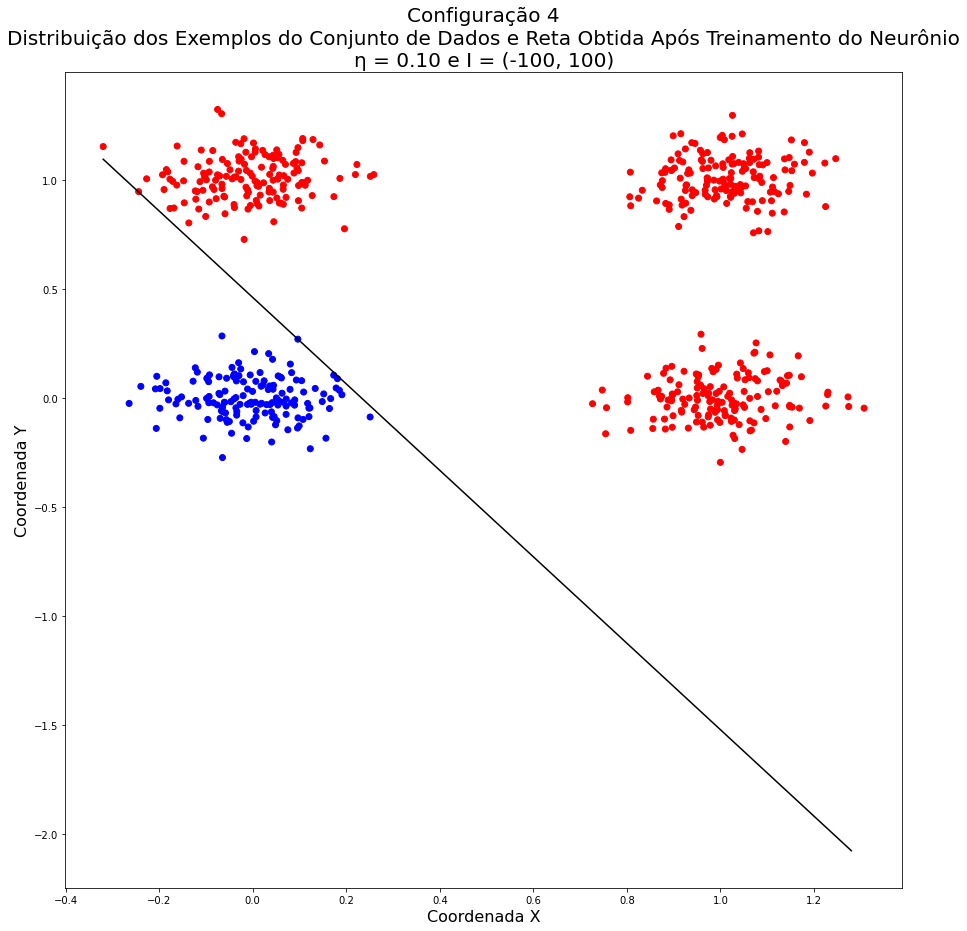

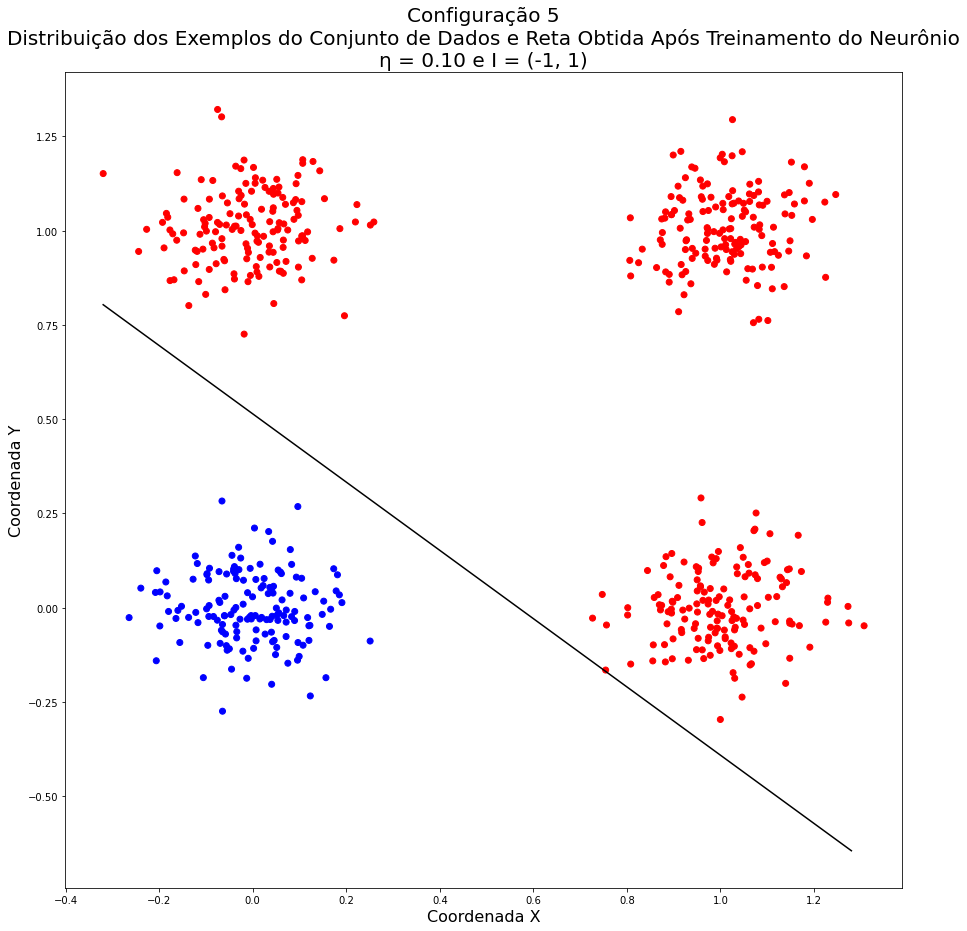

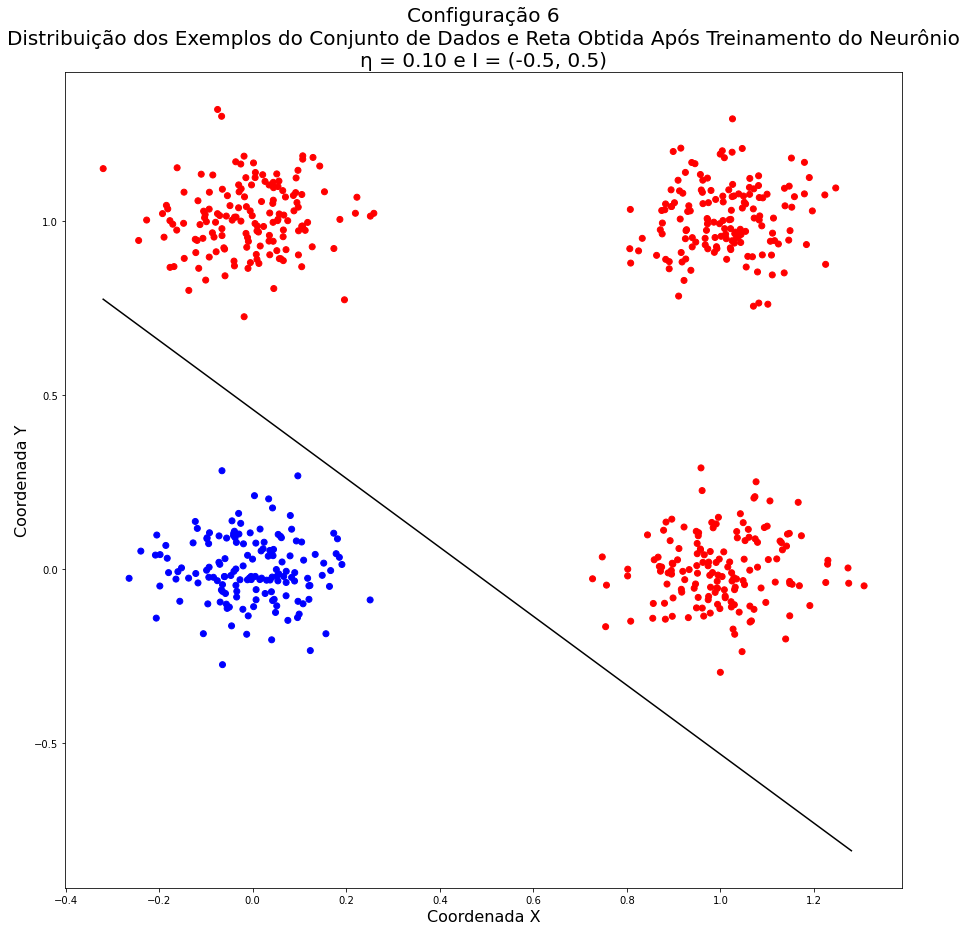

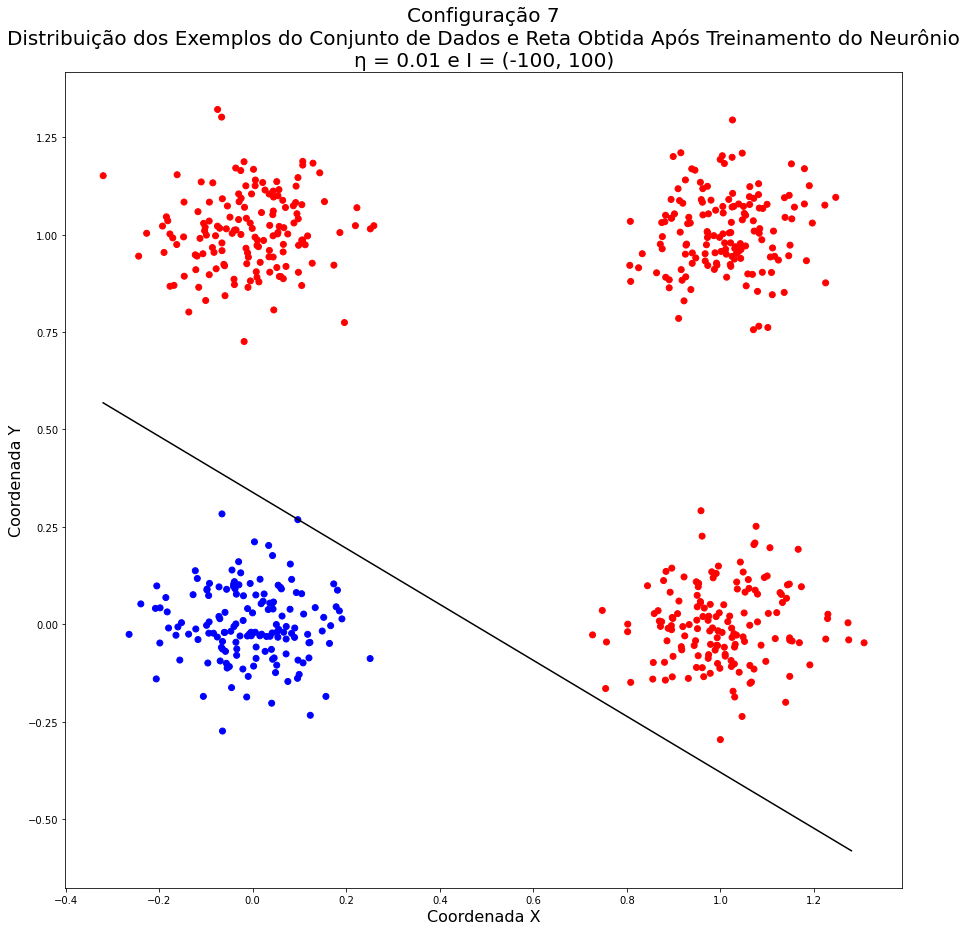

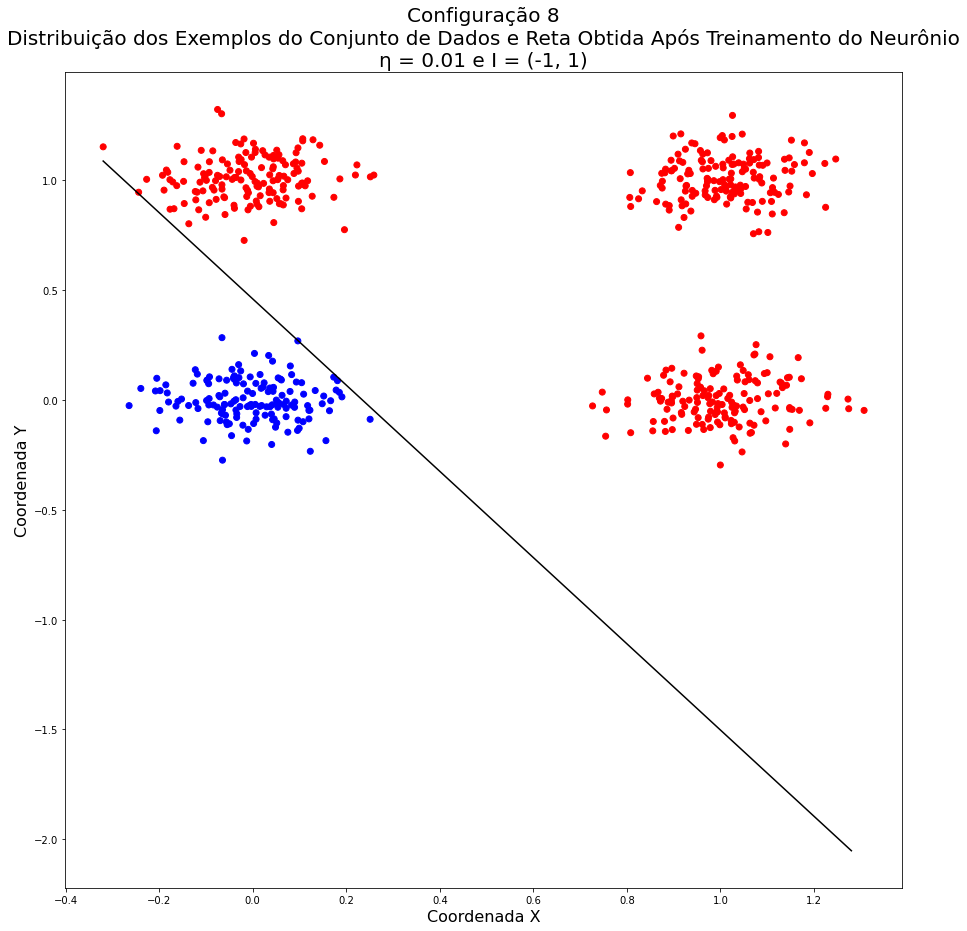

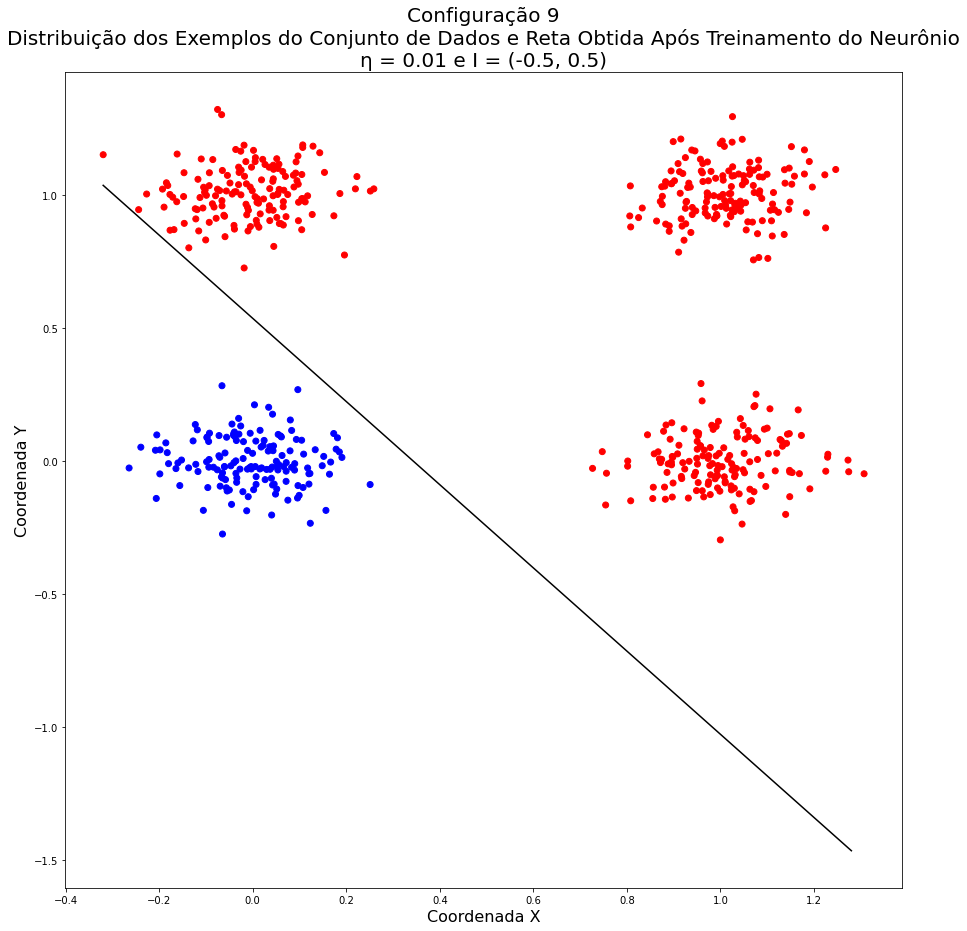

In [22]:
for i in range(configuracoes.shape[0]):
    n, intervalo = configuracoes['n'][i], configuracoes['intervalo'][i]
    
    pesos_iniciais = np.random.uniform(intervalo[0], intervalo[1], X.shape[1])
    perceptron2 = Perceptron(teta=teta, taxa_aprendizagem=n, pesos=pesos_iniciais)
    
    epocas, ajustes_por_epoca = perceptron2.treinamento(X, Y, debug=False)
    
    # Cálculo dos coeficientes da linha de decisão
    a, b = perceptron2.pesos[0] / perceptron2.pesos[2], (-1) * (perceptron2.pesos[1] / perceptron2.pesos[2])
    menor, maior = min(X[:,1]), max(X[:,1])
    
    # Criando os pontos da linha de decisão para treino
    x = np.arange(menor, maior, 0.1)
    y = a + b * x
    
    # Criação de cores de acordo com a saída
    cores = criar_cores(Y)
    
    # Criação do gráfico    
    plt.plot(x, y, color='black', markersize=100)
    
    plt.title('Configuração %d\n' \
              'Distribuição dos Exemplos do Conjunto de Dados e ' \
              'Reta Obtida Após Treinamento do Neurônio\n' \
              'η = %.2f e I = %s' % (i + 1, n, intervalo), size=20)
    
    plt.xlabel('Coordenada X', size=16)
    plt.ylabel('Coordenada Y', size=16)
    
    plt.scatter(X[:,1], X[:,2], marker='o', color=cores)
    plt.show()

### Reexecução do Treinamento por 100 Iterações

In [23]:
res_configuracoes = []

for i in range(configuracoes.shape[0]):
    n, intervalo = configuracoes['n'][i], configuracoes['intervalo'][i]
    execucoes, ajustes = [], []
    
    for j in range(100):        
        pesos_iniciais = np.random.uniform(intervalo[0], intervalo[1], X.shape[1])
        perceptron2 = Perceptron(teta=teta, taxa_aprendizagem=n, pesos=pesos_iniciais)

        epocas, ajustes_por_epoca = perceptron2.treinamento(X, Y, debug=False)    
        
        execucoes.append(epocas)
        ajustes.append(sum(ajustes_por_epoca))
    
    res_configuracoes.append([intervalo[0], intervalo[1], n, sum(execucoes), sum(ajustes)])
    
    print('\n' + '_' * 38 + '100 execuções para a configuração ' + str(i + 1) + '_' * 38 + '\n')
    
    df = {'Quantidade de Ajustes de Pesos:': sum(ajustes),
          'Média de Ajustes de Pesos:': np.average(ajustes),
          'Desvio Padrão dos Ajustes de Pesos:': np.std(ajustes),
          'Quantidade de Épocas:': sum(execucoes),
          'Media de Épocas:': np.average(execucoes),
          'Desvio Padrão de Épocas:': np.std(execucoes)}
    
    print(pd.DataFrame.from_dict(df, orient='index', columns=['Valor']))


______________________________________100 execuções para a configuração 1______________________________________

                                           Valor
Quantidade de Ajustes de Pesos:      114258.0000
Média de Ajustes de Pesos:             1142.5800
Desvio Padrão dos Ajustes de Pesos:     660.5157
Quantidade de Épocas:                  1986.0000
Media de Épocas:                         19.8600
Desvio Padrão de Épocas:                 13.5949

______________________________________100 execuções para a configuração 2______________________________________

                                         Valor
Quantidade de Ajustes de Pesos:      3588.0000
Média de Ajustes de Pesos:             35.8800
Desvio Padrão dos Ajustes de Pesos:    16.5839
Quantidade de Épocas:                 675.0000
Media de Épocas:                        6.7500
Desvio Padrão de Épocas:                1.9513

______________________________________100 execuções para a configuração 3__________________________

## Análise das Configurações  

**Para a experimentação, é importante analisar os parâmetros resultantes do treinamento, baseando-se na quantidade de execuções em função dos parâmetros das configurações adotadas.**

In [24]:
# Conversão do array
res_configuracoes = np.array(res_configuracoes)

# Função para configurar o gráfico de acordo com a configuração e o resultado do treinamento
def grafico_configuracao(y, x, eixo_x, eixo_y, titulo):
    valores_x = np.unique(res_configuracoes[:, y])
    valores_y = np.full((1, len(valores_x)), 0)[0]
    
    for i in res_configuracoes:
        index = np.where(valores_x == i[y])[0][0]
        valores_y[index] = valores_y[index] + i[x]
        
    plt.plot(valores_x, valores_y, color='black', markersize=100)
    
    plt.title(titulo, size=20)
    plt.xlabel(eixo_x, size=16)
    plt.ylabel(eixo_y, size=16)
    
    plt.show()

### Quantidade Total de Ajustes em Função do Módulo do Intervalo para a Distribuição dos Pesos Iniciais

**Neste gráfico observamos que, quanto maior o intervalo dos valores iniciais de pesos, maior é a quantidade de ajustes.**

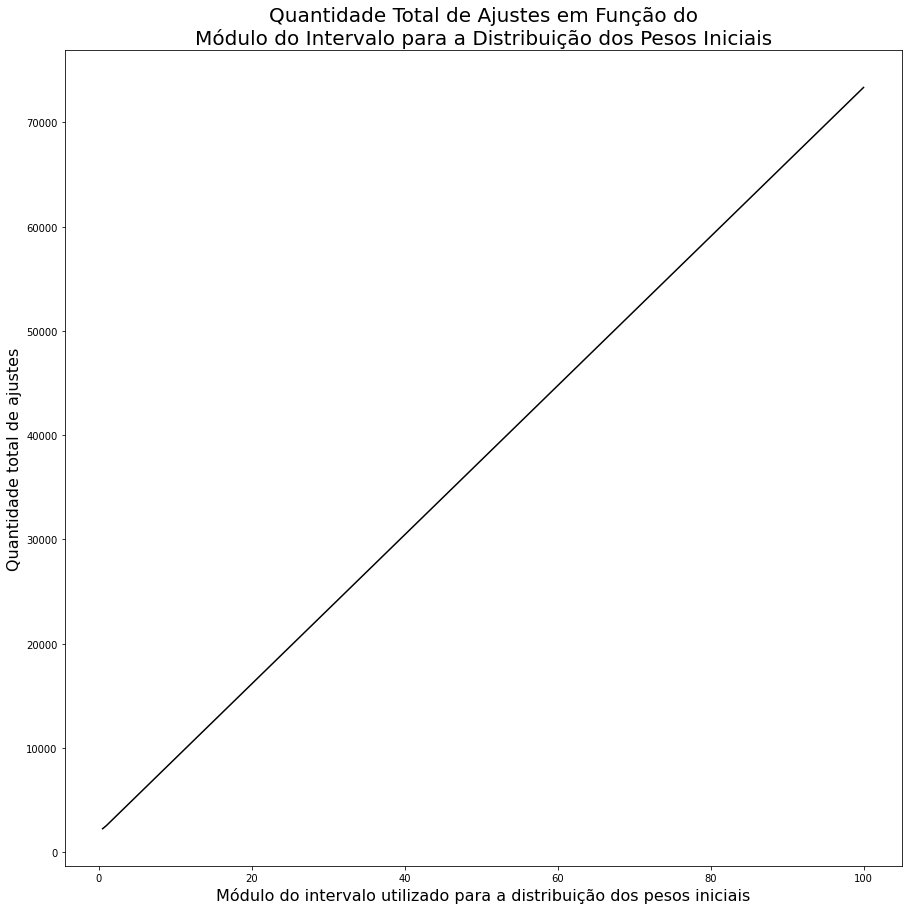

In [25]:
eixo_x = 'Módulo do intervalo utilizado para a distribuição dos pesos iniciais'
eixo_y = 'Quantidade total de ajustes'
titulo = 'Quantidade Total de Ajustes em Função do\nMódulo do Intervalo para a Distribuição dos Pesos Iniciais'

grafico_configuracao(1, 3, eixo_x, eixo_y, titulo)

### Quantidade Total de Épocas em Função da Taxa de Aprendizagem

**Neste gráfico observamos que, quanto maior a taxa de aprendizado, menor é a quantidade de ajustes.**

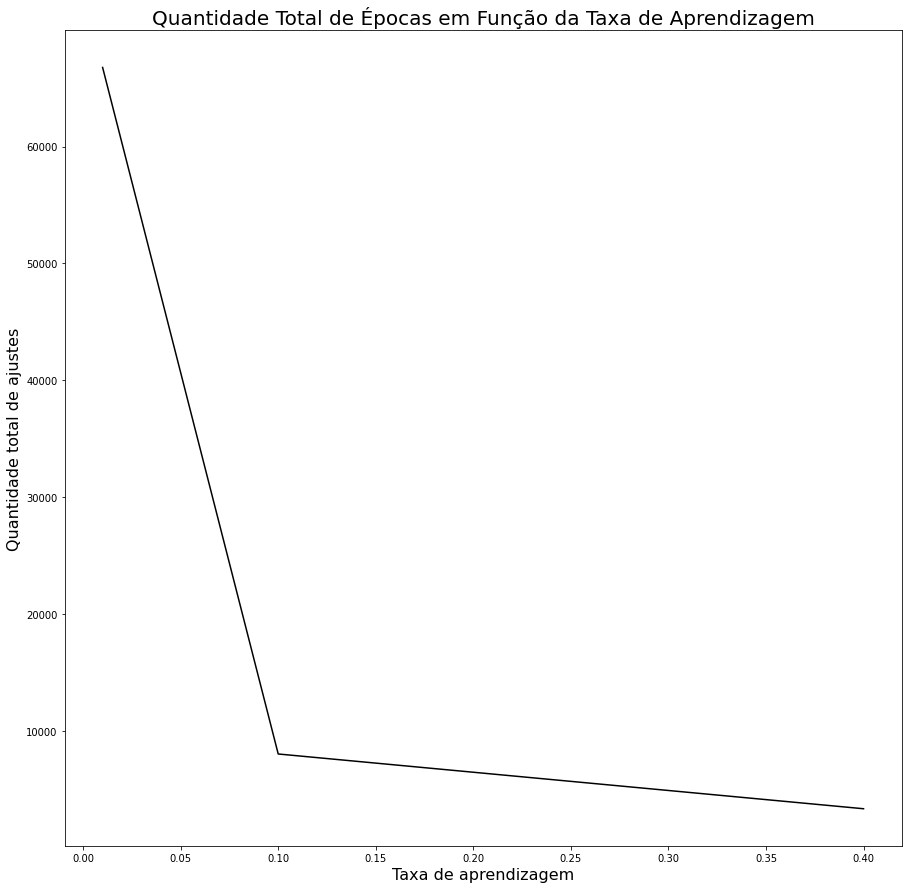

In [26]:
eixo_x = 'Taxa de aprendizagem'
eixo_y = 'Quantidade total de ajustes'
titulo = 'Quantidade Total de Épocas em Função da Taxa de Aprendizagem'

grafico_configuracao(2, 3, eixo_x, eixo_y, titulo)

### Quantidade Total de Épocas em Função do Módulo do Intervalo para a Distribuição dos Pesos Iniciais

**Neste gráfico observamos que, quanto maior o intervalo dos valores iniciais de pesos, maior é a quantidade de épocas.**

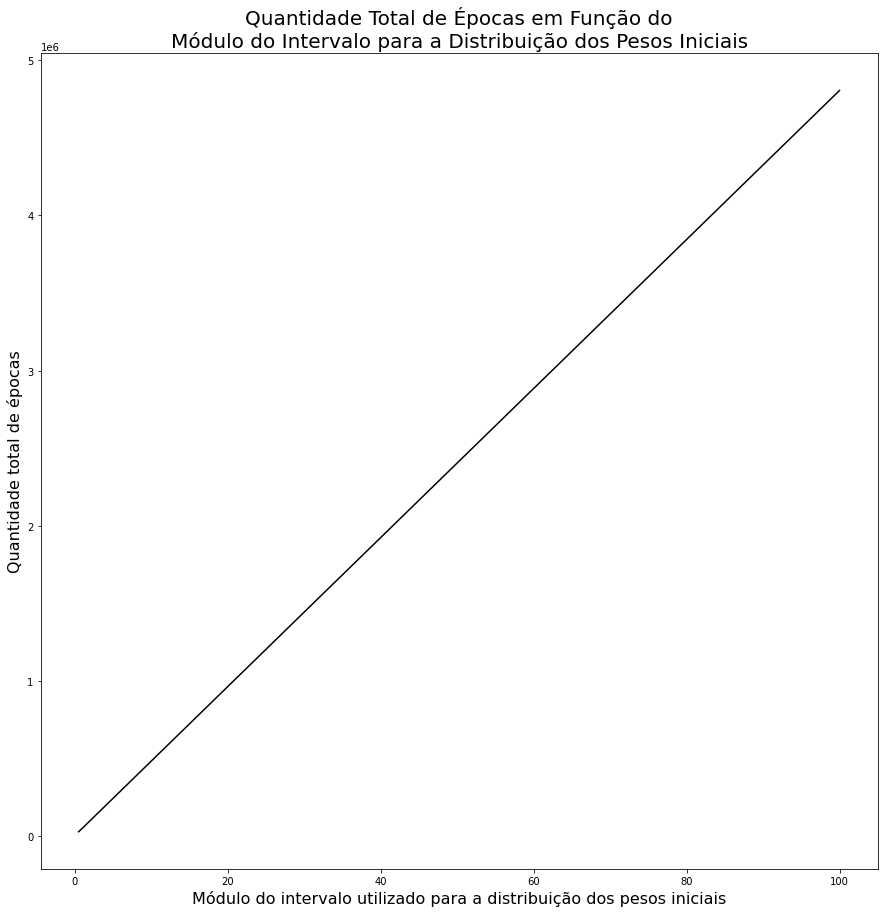

In [27]:
eixo_x = 'Módulo do intervalo utilizado para a distribuição dos pesos iniciais'
eixo_y = 'Quantidade total de épocas'
titulo = 'Quantidade Total de Épocas em Função do\nMódulo do Intervalo para a Distribuição dos Pesos Iniciais'

grafico_configuracao(1, 4, eixo_x, eixo_y, titulo)

### Quantidade Total de Épocas em Função do Módulo da Taxa de Aprendizagem

**Neste gráfico observamos que, quanto maior a taxa de aprendizado, menor é a quantidade de épocas.**

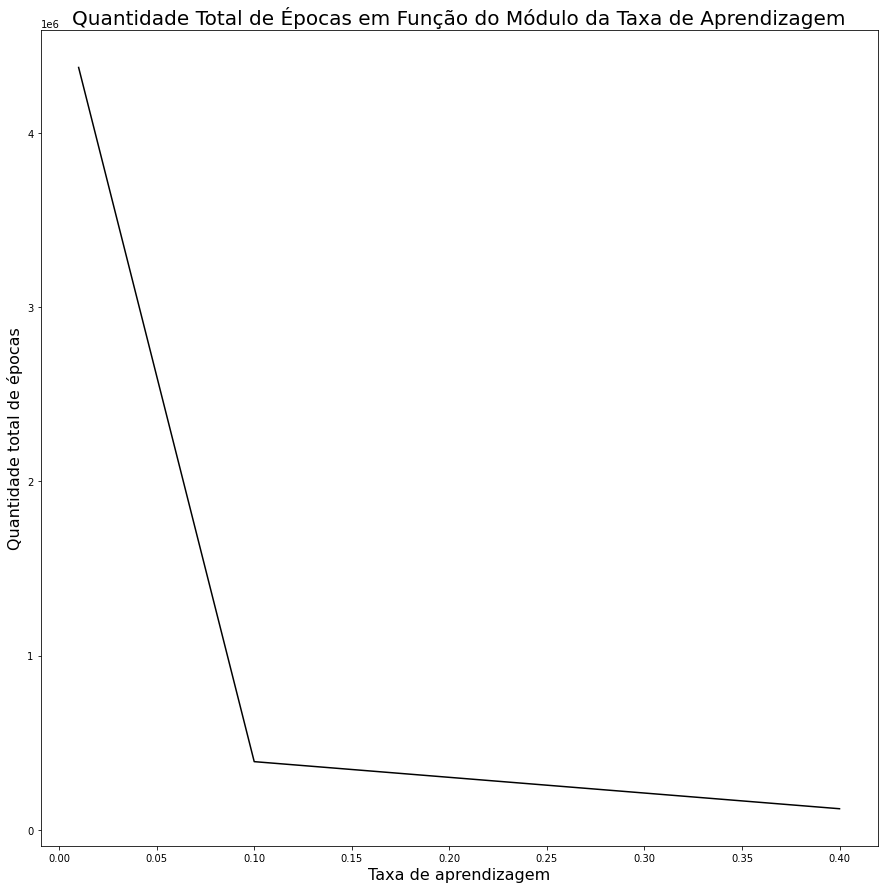

In [28]:
eixo_x = 'Taxa de aprendizagem'
eixo_y = 'Quantidade total de épocas'
titulo = 'Quantidade Total de Épocas em Função do Módulo da Taxa de Aprendizagem'

grafico_configuracao(2, 4, eixo_x, eixo_y, titulo)

### Verificando Quais Configurações Obtiveram Menor ou Maior Quantidade de Ajustes e Épocas

**Configuração que teve menor quantidade de ajustes**

In [29]:
val = np.where(res_configuracoes[:,3] == min(res_configuracoes[:,3]))[0][0]
print('η = %.2f e I = %s' % (res_configuracoes[val][2], (res_configuracoes[val][0], res_configuracoes[val][1])))

η = 0.40 e I = (-1.0, 1.0)


**Configuração que teve maior quantidade de ajustes**

In [30]:
val = np.where(res_configuracoes[:,3] == max(res_configuracoes[:,3]))[0][0]
print('η = %.2f e I = %s' % (res_configuracoes[val][2], (res_configuracoes[val][0], res_configuracoes[val][1])))

η = 0.01 e I = (-100.0, 100.0)


**Configuração que teve menor quantidade de épocas**

In [31]:
val = np.where(res_configuracoes[:,4] == min(res_configuracoes[:,4]))[0][0]
print('η = %.2f e I = %s' % (res_configuracoes[val][2], (res_configuracoes[val][0], res_configuracoes[val][1])))

η = 0.40 e I = (-0.5, 0.5)


**Configuração que teve maior quantidade de épocas**

In [32]:
val = np.where(res_configuracoes[:,4] == max(res_configuracoes[:,4]))[0][0]
print('η = %.2f e I = %s' % (res_configuracoes[val][2], (res_configuracoes[val][0], res_configuracoes[val][1])))

η = 0.01 e I = (-100.0, 100.0)


### Tabela com Todos os Resultados Obtidos Ordenados de Forma Decrescente por Quantidade de Ajustes

In [33]:
df = []

for i in range(len(res_configuracoes)):
    df.append({'η': res_configuracoes[i][2],
               'I': (res_configuracoes[i][0], res_configuracoes[i][1]),
               'Quantidade de Épocas': res_configuracoes[i][3],
               'Quantidade de Ajustes': res_configuracoes[i][4]})
    
df = pd.DataFrame.from_dict(df)
df.sort_values(by='Quantidade de Ajustes')

,η,I,Quantidade de Épocas,Quantidade de Ajustes
2,0.40,"(-0.5, 0.5)",688.0,3141.0
1,0.40,"(-1.0, 1.0)",675.0,3588.0
5,0.10,"(-0.5, 0.5)",679.0,4251.0
4,0.10,"(-1.0, 1.0)",684.0,5976.0
8,0.01,"(-0.5, 0.5)",876.0,22923.0
7,0.01,"(-1.0, 1.0)",1190.0,43815.0
0,0.40,"(-100.0, 100.0)",1986.0,114258.0
3,0.10,"(-100.0, 100.0)",6670.0,381102.0
6,0.01,"(-100.0, 100.0)",64701.0,4309398.0


### Tabela com Todos os Resultados Obtidos Ordenados de Forma Decrescente por Quantidade de Épocas

In [34]:
df = []

for i in range(len(res_configuracoes)):
    df.append({'η': res_configuracoes[i][2],
               'I': (res_configuracoes[i][0], res_configuracoes[i][1]),
               'Quantidade de Épocas': res_configuracoes[i][3],
               'Quantidade de Ajustes': res_configuracoes[i][4]})
    
df = pd.DataFrame.from_dict(df)
df.sort_values(by='Quantidade de Épocas')

,η,I,Quantidade de Épocas,Quantidade de Ajustes
1,0.40,"(-1.0, 1.0)",675.0,3588.0
5,0.10,"(-0.5, 0.5)",679.0,4251.0
4,0.10,"(-1.0, 1.0)",684.0,5976.0
2,0.40,"(-0.5, 0.5)",688.0,3141.0
8,0.01,"(-0.5, 0.5)",876.0,22923.0
7,0.01,"(-1.0, 1.0)",1190.0,43815.0
0,0.40,"(-100.0, 100.0)",1986.0,114258.0
3,0.10,"(-100.0, 100.0)",6670.0,381102.0
6,0.01,"(-100.0, 100.0)",64701.0,4309398.0


**Desta forma, é evidente o impacto de diferentes parâmetros no tempo de convergência durante o aprendizado do neurônio, em especial o intervalo utilizado para a geração uniforme dos pesos iniciais do neurônio. Durante a análise, foi possível perceber-se que quanto maior o intervalo utilizado para a geração dos pesos, maior a quantidade de ajustes necessários para a convergência da solução, independetemente dos outros parâmetros considerados. Assim, é possível afirmar-se que no contexto abordado, é mais adequado o emprego de intervalos de distribuição menores, a fim de diminuir o tempo de treinamento do neurônio, tal como a necessidade de poder computacional necessária para fazer os devidos ajustes para convergência.** 

## Parte III – Validação _Holdout_ em Problema Não-Linearmente Separável

### Leitura do arquivo `dataHoldout.txt`

In [35]:
data = np.fromfile(os.path.join('datasets', 'dataHoldout.txt'), dtype=float)
print(data.shape)

(2400,)


### Redimensionamento do Array

In [36]:
registros = data.reshape(data.size // 3, 3)
print(registros.shape)

(800, 3)


### Preparação dos Arrays de Entradas e Saídas

In [37]:
X = separar_entradas(registros)
print(X.shape)

Y = separar_saidas(registros)
print(Y.shape)

(800, 3)
(800,)


### Gráfico da Distribuição dos Dados

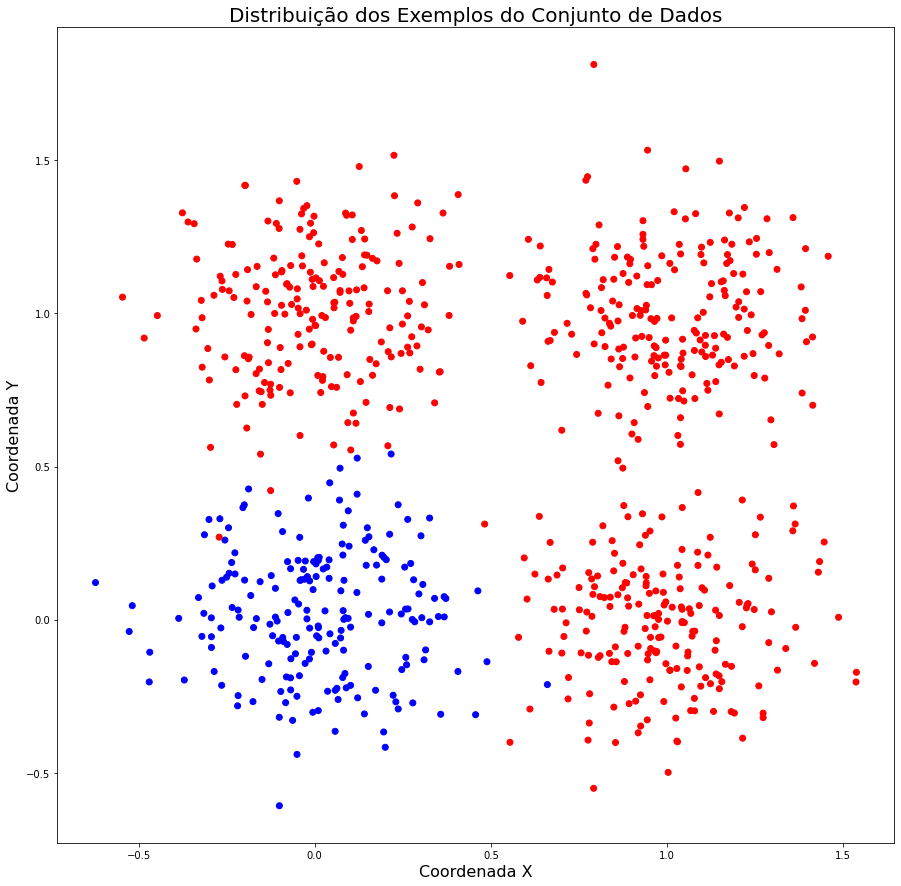

In [38]:
cores = criar_cores(Y)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Distribuição dos Exemplos do Conjunto de Dados', size=20)

plt.xlabel('Coordenada X', size=16)
plt.ylabel('Coordenada Y', size=16)

plt.scatter(X[:,1], X[:,2], marker='o', color=cores)
plt.show()

**Desta forma, é possível observar que apenas uma reta não é capaz de separar todos os exemplos do conjunto de dados, sem que exemplos com diferentes rótulos se misturem, sendo abordado melhor a seguir.**

### Randomização dos Dados

In [39]:
X, Y = aleatoriza(X, Y)

**Antes da aplicação do _Holdout_, os dados são aleatorizados de modo minimizar um possível superajuste durante a etapa de treinamento. Vale ressaltar-se que durante o treinamento, a partição destinada a treino, será aleatorizada novamente a cada época, conforme será observado a frente.** 

### Aplicação do _Holdout_

In [40]:
lim = int(len(X) * 0.7)

X_treino, Y_treino, X_teste, Y_teste = X[:lim], Y[:lim], X[lim:], Y[lim:]
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(560, 3) (240, 3) (560,) (240,)


### Parâmetros do Neurônio

In [41]:
teta, taxa_aprendizagem, pesos_iniciais = 0, 0.1, np.random.uniform(-0.5, 0.5, X_treino.shape[1])

### Instanciação do Perceptron

In [42]:
perceptron3 = Perceptron(teta=0, taxa_aprendizagem=0.1, pesos=pesos_iniciais)
print(perceptron3.pesos)

[-0.3279 -0.1625 -0.2874]


### Treinamento do Neurônio

In [43]:
epocas, ajustes_por_epoca = perceptron3.treinamento(X_treino, Y_treino, max_epocas=100, aleatorio=True)

Pesos Iniciais: [-0.3279 -0.1625 -0.2874]

Novos Pesos: [-0.2279 -0.1556 -0.403 ]
Novos Pesos: [-0.1279 -0.2559 -0.3531]
Novos Pesos: [-0.2279 -0.2258 -0.3257]
Novos Pesos: [-0.1279 -0.1954 -0.4143]
Novos Pesos: [-0.0279 -0.2979 -0.3822]
Novos Pesos: [-0.1279 -0.2804 -0.3643]
Novos Pesos: [-0.2279 -0.2761 -0.3196]
Novos Pesos: [-0.1279 -0.3542 -0.2954]
Novos Pesos: [-0.2279 -0.2881 -0.3166]
Novos Pesos: [-0.1279 -0.2729 -0.3911]
Novos Pesos: [-0.2279 -0.2357 -0.3841]
Novos Pesos: [-0.1279 -0.3572 -0.3454]
Novos Pesos: [-0.2279 -0.3231 -0.3385]
Novos Pesos: [-0.1279 -0.3131 -0.4143]
Novos Pesos: [-0.2279 -0.2859 -0.396 ]
Novos Pesos: [-0.1279 -0.3638 -0.3622]
Novos Pesos: [-0.2279 -0.3485 -0.3352]
Novos Pesos: [-0.1279 -0.4377 -0.3077]
Novos Pesos: [-0.2279 -0.4051 -0.2745]
Novos Pesos: [-0.1279 -0.4153 -0.33  ]
Novos Pesos: [-0.2279 -0.369  -0.3206]
Novos Pesos: [-0.1279 -0.3565 -0.3974]
Novos Pesos: [-0.2279 -0.3374 -0.3764]
Novos Pesos: [-0.1279 -0.4151 -0.3648]
Novos Pesos: [-0.2279

Novos Pesos: [-0.2279 -0.4464 -0.3628]
Novos Pesos: [-0.1279 -0.4311 -0.4372]
Novos Pesos: [-0.2279 -0.4007 -0.4366]
Novos Pesos: [-0.1279 -0.3853 -0.4907]
Novos Pesos: [-0.2279 -0.3481 -0.4837]
Novos Pesos: [-0.1279 -0.426  -0.45  ]
Novos Pesos: [-0.2279 -0.4107 -0.4229]
Novos Pesos: [-0.3279 -0.3781 -0.3897]
Novos Pesos: [-0.2279 -0.466  -0.3695]
Novos Pesos: [-0.1279 -0.4213 -0.4688]
Novos Pesos: [-0.2279 -0.375  -0.4594]
Novos Pesos: [-0.1279 -0.4599 -0.4309]
Novos Pesos: [-0.2279 -0.4527 -0.3814]
Novos Pesos: [-0.1279 -0.4228 -0.4597]
Novos Pesos: [-0.2279 -0.4108 -0.4187]
Novos Pesos: [-0.1279 -0.3836 -0.4456]
Novos Pesos: [-0.2279 -0.3599 -0.4081]
Novos Pesos: [-0.1279 -0.4355 -0.3973]
Novos Pesos: [-0.2279 -0.4139 -0.3432]
Novos Pesos: [-0.1279 -0.3819 -0.4256]
Novos Pesos: [-0.0279 -0.3523 -0.4819]

87 ajustes no vetor de pesos na época 13

Novos Pesos: [-0.1279 -0.3453 -0.4428]
Novos Pesos: [-0.0279 -0.4456 -0.393 ]
Novos Pesos: [-0.1279 -0.4155 -0.3656]
Novos Pesos: [-0.2279

Novos Pesos: [-0.1279 -0.4548 -0.4228]
Novos Pesos: [-0.2279 -0.4476 -0.3733]
Novos Pesos: [-0.1279 -0.4157 -0.4719]
Novos Pesos: [-0.2279 -0.4036 -0.4309]
Novos Pesos: [-0.1279 -0.3765 -0.4579]
Novos Pesos: [-0.2279 -0.3528 -0.4203]
Novos Pesos: [-0.1279 -0.4284 -0.4095]
Novos Pesos: [-0.2279 -0.4067 -0.3554]
Novos Pesos: [-0.1279 -0.3748 -0.4378]

84 ajustes no vetor de pesos na época 27

Novos Pesos: [-0.2279 -0.3678 -0.3988]
Novos Pesos: [-0.1279 -0.4681 -0.3489]
Novos Pesos: [-0.2279 -0.4379 -0.3215]
Novos Pesos: [-0.1279 -0.4076 -0.4101]
Novos Pesos: [-0.2279 -0.3708 -0.4026]
Novos Pesos: [-0.1279 -0.4287 -0.3968]
Novos Pesos: [-0.2279 -0.4244 -0.3521]
Novos Pesos: [-0.1279 -0.5098 -0.312 ]
Novos Pesos: [-0.2279 -0.4783 -0.3219]
Novos Pesos: [-0.3279 -0.4123 -0.3431]
Novos Pesos: [-0.2279 -0.3971 -0.4175]
Novos Pesos: [-0.1279 -0.3817 -0.4716]
Novos Pesos: [-0.2279 -0.3445 -0.4646]
Novos Pesos: [-0.1279 -0.4224 -0.4309]
Novos Pesos: [-0.2279 -0.407  -0.4038]
Novos Pesos: [-0.3279

Novos Pesos: [-0.2279 -0.3193 -0.45  ]
Novos Pesos: [-0.1279 -0.4197 -0.4001]
Novos Pesos: [-0.2279 -0.3895 -0.3727]
Novos Pesos: [-0.1279 -0.3591 -0.4613]
Novos Pesos: [-0.2279 -0.3224 -0.4538]
Novos Pesos: [-0.1279 -0.4249 -0.4217]
Novos Pesos: [-0.2279 -0.4074 -0.4038]
Novos Pesos: [-0.1279 -0.4652 -0.3981]
Novos Pesos: [-0.2279 -0.461  -0.3534]
Novos Pesos: [-0.1279 -0.522  -0.3242]
Novos Pesos: [-0.2279 -0.4906 -0.3341]
Novos Pesos: [-0.3279 -0.4245 -0.3553]
Novos Pesos: [-0.2279 -0.4093 -0.4297]
Novos Pesos: [-0.1279 -0.3939 -0.4838]
Novos Pesos: [-0.2279 -0.3567 -0.4768]
Novos Pesos: [-0.1279 -0.4346 -0.4431]
Novos Pesos: [-0.2279 -0.4192 -0.416 ]
Novos Pesos: [-0.3279 -0.3866 -0.3828]
Novos Pesos: [-0.2279 -0.4745 -0.3626]
Novos Pesos: [-0.1279 -0.4299 -0.4619]
Novos Pesos: [-0.2279 -0.3836 -0.4525]
Novos Pesos: [-0.1279 -0.4685 -0.424 ]
Novos Pesos: [-0.2279 -0.4613 -0.3745]
Novos Pesos: [-0.1279 -0.4293 -0.4731]
Novos Pesos: [-0.2279 -0.4173 -0.4321]
Novos Pesos: [-0.1279 -0.

Novos Pesos: [-0.1279 -0.4588 -0.4295]
Novos Pesos: [-0.2279 -0.4516 -0.3801]
Novos Pesos: [-0.1279 -0.4217 -0.4583]
Novos Pesos: [-0.2279 -0.4097 -0.4174]
Novos Pesos: [-0.1279 -0.3825 -0.4443]
Novos Pesos: [-0.2279 -0.3589 -0.4068]
Novos Pesos: [-0.1279 -0.4345 -0.3959]
Novos Pesos: [-0.2279 -0.4128 -0.3418]
Novos Pesos: [-0.1279 -0.3808 -0.4243]
Novos Pesos: [-0.0279 -0.3512 -0.4805]

87 ajustes no vetor de pesos na época 55

Novos Pesos: [-0.1279 -0.3442 -0.4415]
Novos Pesos: [-0.0279 -0.4445 -0.3916]
Novos Pesos: [-0.1279 -0.4144 -0.3642]
Novos Pesos: [-0.2279 -0.3776 -0.3567]
Novos Pesos: [-0.1279 -0.365  -0.4317]
Novos Pesos: [-0.2279 -0.3607 -0.387 ]
Novos Pesos: [-0.1279 -0.4387 -0.3628]
Novos Pesos: [-0.2279 -0.3727 -0.384 ]
Novos Pesos: [-0.1279 -0.3573 -0.4381]
Novos Pesos: [-0.2279 -0.3201 -0.4311]
Novos Pesos: [-0.1279 -0.4415 -0.3924]
Novos Pesos: [-0.2279 -0.4075 -0.3855]
Novos Pesos: [-0.1279 -0.4855 -0.3517]
Novos Pesos: [-0.2279 -0.4701 -0.3247]
Novos Pesos: [-0.3279

Novos Pesos: [-0.1279 -0.3891 -0.4632]
Novos Pesos: [-0.2279 -0.3654 -0.4257]
Novos Pesos: [-0.3279 -0.3437 -0.3716]
Novos Pesos: [-0.2279 -0.41   -0.3848]
Novos Pesos: [-0.1279 -0.378  -0.4673]

84 ajustes no vetor de pesos na época 69

Novos Pesos: [-0.2279 -0.371  -0.4282]
Novos Pesos: [-0.1279 -0.4713 -0.3783]
Novos Pesos: [-0.2279 -0.4412 -0.351 ]
Novos Pesos: [-0.1279 -0.4108 -0.4395]
Novos Pesos: [-0.2279 -0.3741 -0.432 ]
Novos Pesos: [-0.1279 -0.4319 -0.4262]
Novos Pesos: [-0.2279 -0.4277 -0.3815]
Novos Pesos: [-0.1279 -0.5131 -0.3414]
Novos Pesos: [-0.2279 -0.447  -0.3626]
Novos Pesos: [-0.1279 -0.4318 -0.437 ]
Novos Pesos: [-0.2279 -0.4014 -0.4364]
Novos Pesos: [-0.1279 -0.386  -0.4905]
Novos Pesos: [-0.2279 -0.3488 -0.4835]
Novos Pesos: [-0.1279 -0.4267 -0.4498]
Novos Pesos: [-0.2279 -0.4113 -0.4227]
Novos Pesos: [-0.3279 -0.3787 -0.3895]
Novos Pesos: [-0.2279 -0.4666 -0.3693]
Novos Pesos: [-0.1279 -0.4219 -0.4686]
Novos Pesos: [-0.2279 -0.3756 -0.4592]
Novos Pesos: [-0.1279

Novos Pesos: [-0.1279 -0.5296 -0.3738]
Novos Pesos: [-0.2279 -0.4981 -0.3836]
Novos Pesos: [-0.3279 -0.4321 -0.4048]
Novos Pesos: [-0.2279 -0.4169 -0.4793]
Novos Pesos: [-0.1279 -0.4015 -0.5333]
Novos Pesos: [-0.2279 -0.3642 -0.5264]
Novos Pesos: [-0.1279 -0.4422 -0.4927]
Novos Pesos: [-0.2279 -0.4268 -0.4656]
Novos Pesos: [-0.3279 -0.3942 -0.4324]
Novos Pesos: [-0.2279 -0.4821 -0.4122]
Novos Pesos: [-0.1279 -0.4374 -0.5115]
Novos Pesos: [-0.2279 -0.3911 -0.5021]
Novos Pesos: [-0.1279 -0.476  -0.4736]
Novos Pesos: [-0.2279 -0.4688 -0.4241]
Novos Pesos: [-0.1279 -0.4389 -0.5024]
Novos Pesos: [-0.2279 -0.4269 -0.4614]
Novos Pesos: [-0.1279 -0.3997 -0.4883]
Novos Pesos: [-0.2279 -0.3761 -0.4508]
Novos Pesos: [-0.3279 -0.3544 -0.3967]
Novos Pesos: [-0.2279 -0.4207 -0.4099]
Novos Pesos: [-0.1279 -0.3887 -0.4924]

84 ajustes no vetor de pesos na época 84

Novos Pesos: [-0.2279 -0.3817 -0.4533]
Novos Pesos: [-0.1279 -0.482  -0.4035]
Novos Pesos: [-0.2279 -0.4518 -0.3761]
Novos Pesos: [-0.1279

Novos Pesos: [-0.1279 -0.4123 -0.4408]
Novos Pesos: [-0.2279 -0.3755 -0.4332]
Novos Pesos: [-0.1279 -0.4334 -0.4275]
Novos Pesos: [-0.2279 -0.4291 -0.3828]
Novos Pesos: [-0.1279 -0.5145 -0.3427]
Novos Pesos: [-0.2279 -0.483  -0.3526]
Novos Pesos: [-0.3279 -0.417  -0.3737]
Novos Pesos: [-0.2279 -0.4018 -0.4482]
Novos Pesos: [-0.1279 -0.3864 -0.5022]
Novos Pesos: [-0.2279 -0.3492 -0.4953]
Novos Pesos: [-0.1279 -0.4271 -0.4616]
Novos Pesos: [-0.2279 -0.4117 -0.4345]
Novos Pesos: [-0.3279 -0.3791 -0.4013]
Novos Pesos: [-0.2279 -0.467  -0.3811]
Novos Pesos: [-0.1279 -0.4223 -0.4804]
Novos Pesos: [-0.2279 -0.376  -0.471 ]
Novos Pesos: [-0.1279 -0.4609 -0.4425]
Novos Pesos: [-0.2279 -0.4537 -0.393 ]
Novos Pesos: [-0.1279 -0.4238 -0.4713]
Novos Pesos: [-0.2279 -0.4118 -0.4303]
Novos Pesos: [-0.1279 -0.3847 -0.4572]
Novos Pesos: [-0.2279 -0.361  -0.4197]
Novos Pesos: [-0.1279 -0.4366 -0.4089]
Novos Pesos: [-0.2279 -0.4149 -0.3548]
Novos Pesos: [-0.1279 -0.383  -0.4372]

84 ajustes no vetor de p

In [44]:
print('Total de Épocas:', epocas)
print('Pesos finais:', perceptron3.pesos)
print('Total de ajustes de pesos:', sum(ajustes_por_epoca))

Total de Épocas: 100
Pesos finais: [-0.1279 -0.383  -0.4372]
Total de ajustes de pesos: 8628


### Cálculo das Saídas para Dados de Treino e Teste

In [45]:
Y_previsto_treino, Y_previsto_teste = perceptron3.predicao(X_treino), perceptron3.predicao(X_teste)

## 1. Apresente a matriz de confusão das previsões efetuadas para o conjunto de testes;

### Matriz de Confusão para Dados de Teste

In [46]:
matriz_teste, valores_matriz_teste = perceptron3.matriz_confusao(Y_previsto_teste, Y_teste)
print(matriz_teste)

[[46, 10], [3, 181]]


## 2. Qual a acurácia da solução proposta para os dados do conjunto de teste inicialmente fornecido?

### Acurácia para Dados de Teste

In [47]:
vp, vn, fp, fn = valores_matriz_teste

print('Acurácia: %.4f' % acuracia(vp, vn, fp, fn))

Acurácia: 0.9458


## 3. Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F-Score;

### Revocação, Precisão e F1 _Score_ para Treino

In [48]:
print('Precisão: %.4f' % precisao(vp, vn, fp, fn))
print('Revocação: %.4f' % revocacao(vp, vn, fp, fn))
print('F1 Score: %.4f' % f1(vp, vn, fp, fn))

Precisão: 0.8214
Revocação: 0.9388
F1 Score: 0.8762


## 4. A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de testes.

### Acurácia, Revocação, Precisão e F1 _Score_ para Teste

In [49]:
vp, vn, fp, fn = valores_matriz_teste

print('Acurácia: %.4f' % acuracia(vp, vn, fp, fn))
print('Precisão: %.4f' % precisao(vp, vn, fp, fn))
print('Revocação: %.4f' % revocacao(vp, vn, fp, fn))
print('F1 Score: %.4f' % f1(vp, vn, fp, fn))

Acurácia: 0.9458
Precisão: 0.8214
Revocação: 0.9388
F1 Score: 0.8762


### Gráficos de Desempenho para Treino e Teste

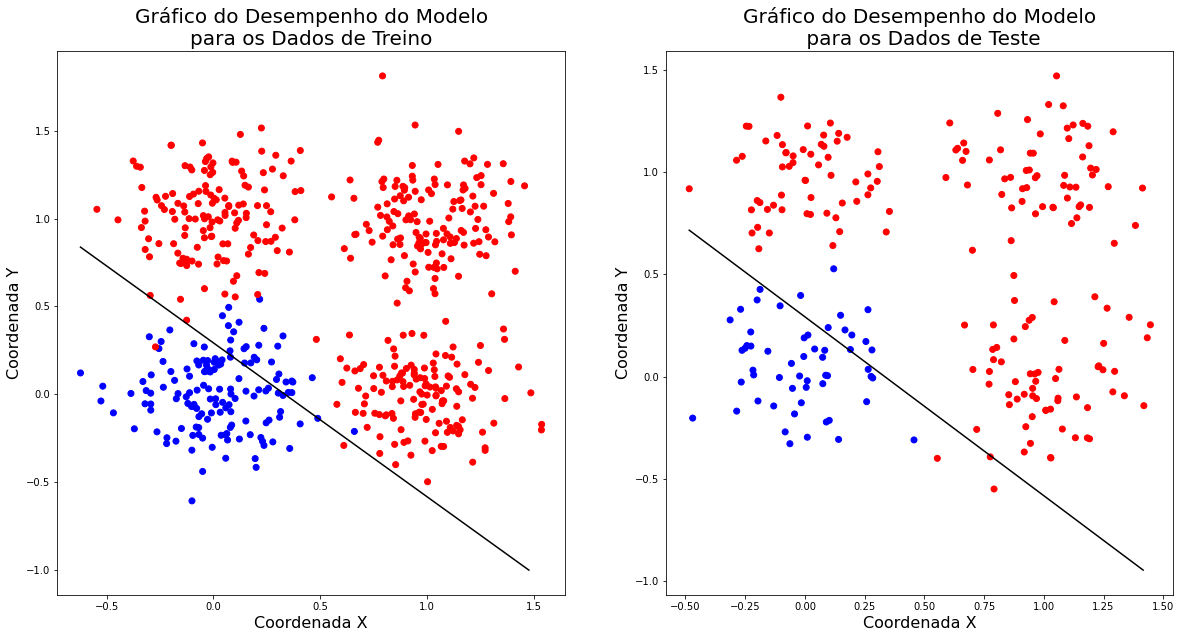

In [50]:
plt.rcParams['figure.figsize'] = (20, 10)

# Cálculo dos coeficientes da linha de decisão
a, b = perceptron3.pesos[0] / perceptron3.pesos[2], (-1) * (perceptron3.pesos[1] / perceptron3.pesos[2])
menor, maior = min(X_treino[:,1]), max(X_treino[:,1])

# Criando os pontos da linha de decisão para treino
x = np.arange(menor, maior, 0.1)
y = a + b * x

# Criação de cores de acordo com a saída
cores_treino = criar_cores(Y_treino)

# Criação do gráfico para treino    
plt.subplot(1, 2, 1)
plt.title('Gráfico do Desempenho do Modelo\npara os Dados de Treino', size=20)

plt.xlabel('Coordenada X', size=16)
plt.ylabel('Coordenada Y', size=16)

plt.plot(x, y, color='black', markersize=100)
plt.scatter(X_treino[:,1], X_treino[:,2], marker='o', color=cores_treino)

# Cálculo dos coeficientes da linha de decisão
a, b = perceptron3.pesos[0] / perceptron3.pesos[2], (-1) * (perceptron3.pesos[1] / perceptron3.pesos[2])
menor, maior = min(X_teste[:,1]), max(X_teste[:,1])

# Criando os pontos da linha de decisão para teste
x = np.arange(menor, maior, 0.1)
y = a + b * x

# Criação de cores de acordo com a saída
cores_teste = criar_cores(Y_teste)

# Criação do gráfico para teste
plt.subplot(1, 2, 2)
plt.title('Gráfico do Desempenho do Modelo\n para os Dados de Teste', size=20)

plt.xlabel('Coordenada X', size=16)
plt.ylabel('Coordenada Y', size=16)

plt.plot(x, y, color='black', markersize=100)
plt.scatter(X_teste[:,1], X_teste[:,2], marker='o', color=cores_teste)

plt.show()

**Assim, como mencionado anteriormente, é evidente a característica não linear do problema abordado, evidenciado pela não convergência do neurôrio durante seu treinamento, tal como a incapacidade de separação dos dados por apenas uma reta, obtida com o neurônio Perceptron. Desta forma, evidencia-se também a necessidade de uma função mais complexa, de forma a implementar uma superfície de separação adequada ao problema apresentado.**  